In [1]:
import pandas as pd
import mysql.connector

In [2]:
# MySQL connection parameters
host = 'localhost'
user = 'root'
password = 'root'
database = 'phase3'

In [3]:
conn = mysql.connector.connect(host=host, user=user, password=password, database=database)


In [4]:
# Execute SQL query to fetch filtered data
query = """
    SELECT STATE_UT, DISTRICT, Year, MURDER
    FROM District_wise_crimes_committed_IPC
    ORDER BY STATE_UT, DISTRICT, Year DESC;
"""
cursor = conn.cursor()
cursor.execute(query)

In [5]:
# Fetch data into a DataFrame
columns = [col[0] for col in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)

In [6]:
# Close cursor and connection
cursor.close()
conn.close()

# Display DataFrame
print(df)

           STATE_UT         DISTRICT  Year  MURDER
0     A & N ISLANDS  A and N ISLANDS  2007      15
1     A & N ISLANDS          ANDAMAN  2011      14
2     A & N ISLANDS          ANDAMAN  2010       8
3     A & N ISLANDS          ANDAMAN  2009      15
4     A & N ISLANDS          ANDAMAN  2008       8
...             ...              ...   ...     ...
9012    WEST BENGAL   UTTAR DINAJPUR  2005      49
9013    WEST BENGAL   UTTAR DINAJPUR  2004      36
9014    WEST BENGAL   UTTAR DINAJPUR  2003      34
9015    WEST BENGAL   UTTAR DINAJPUR  2002      38
9016    WEST BENGAL   UTTAR DINAJPUR  2001      36

[9017 rows x 4 columns]


In [7]:
import pandas as pd

# Define column names
columns = ['STATE_UT', 'DISTRICT', 'Year', 'MURDER']

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

In [8]:
# Group by STATE_UT and DISTRICT, count unique years, filter districts appearing 3 or more years
filtered_df = df.groupby(['STATE_UT', 'DISTRICT']).filter(lambda x: x['Year'].nunique() >= 3)

# Print corresponding data in descending order
print(filtered_df.sort_values(by=['STATE_UT', 'DISTRICT', 'Year'], ascending=[True, True, False]))


           STATE_UT        DISTRICT  Year  MURDER
1     A & N ISLANDS         ANDAMAN  2011      14
2     A & N ISLANDS         ANDAMAN  2010       8
3     A & N ISLANDS         ANDAMAN  2009      15
4     A & N ISLANDS         ANDAMAN  2008       8
5     A & N ISLANDS         ANDAMAN  2006       3
...             ...             ...   ...     ...
9012    WEST BENGAL  UTTAR DINAJPUR  2005      49
9013    WEST BENGAL  UTTAR DINAJPUR  2004      36
9014    WEST BENGAL  UTTAR DINAJPUR  2003      34
9015    WEST BENGAL  UTTAR DINAJPUR  2002      38
9016    WEST BENGAL  UTTAR DINAJPUR  2001      36

[8929 rows x 4 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_8756\1121114224.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


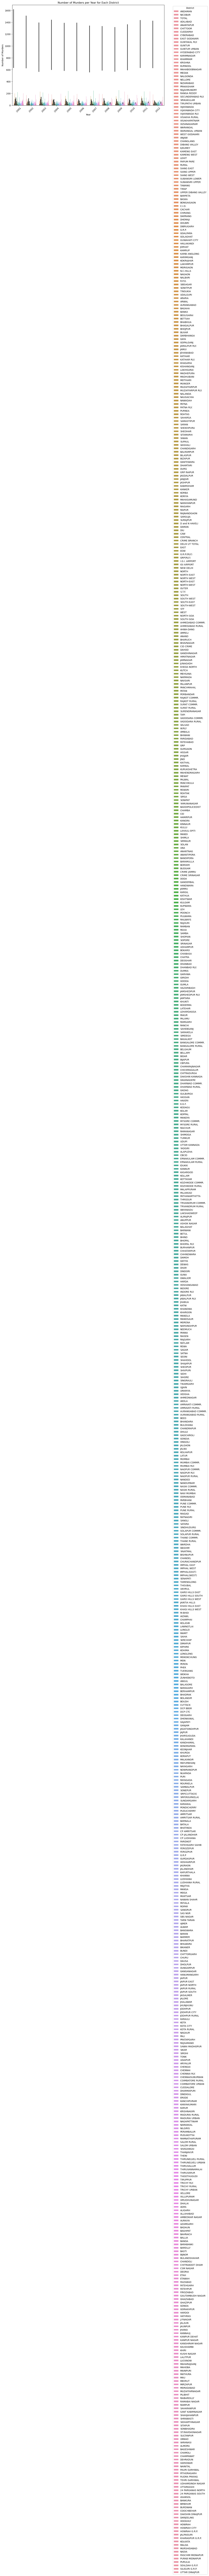

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Year', y='MURDER', hue='DISTRICT')
plt.title('Number of Murders per Year for Each District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8756\3748690600.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


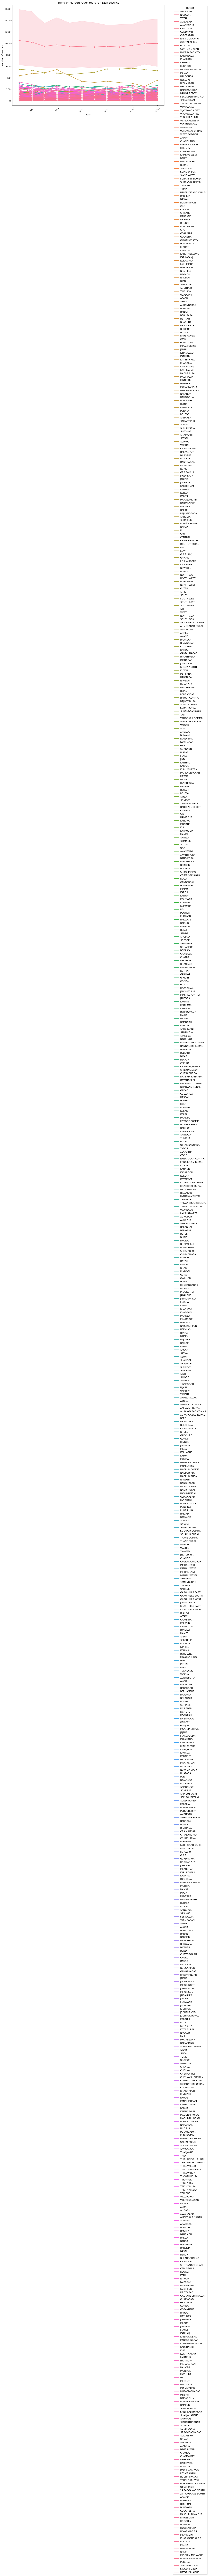

In [10]:
# Create line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_df, x='Year', y='MURDER', hue='DISTRICT', marker='o')
plt.title('Trend of Murders Over Years for Each District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8756\1752447327.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


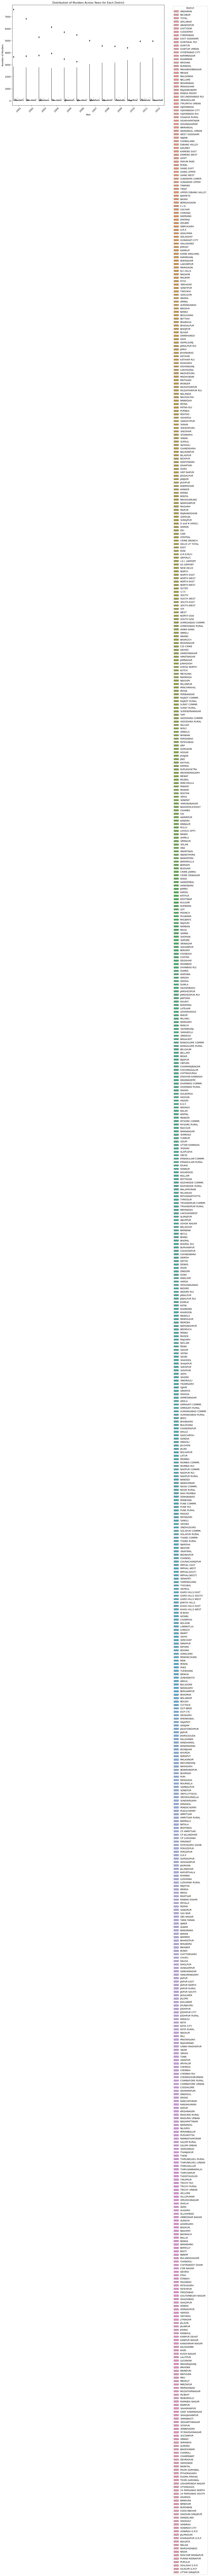

In [15]:
# Create box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Year', y='MURDER', hue='DISTRICT')
plt.title('Distribution of Murders Across Years for Each District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Create swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(data=filtered_df, x='Year', y='MURDER', hue='DISTRICT', dodge=True)
plt.title('Distribution of Murders Across Years for Each District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.xticks(rotation=45)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
